In [1]:
import numpy as np 
import pandas as pd 

C:\Users\nooro\AppData\Local\Temp\ipykernel_8076\200606040.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

#list of possible encodings to try 
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

file_path = 'spam.csv' # change this to the path of your csv file 

# Attempt to read the CSV file with different encodings 
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break #stop the loop
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue #try the next encoding 

# If the loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else: 
    print("All encoding attempts failed. unable to read CSV file.")
    

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4498,spam,"SMS SERVICES. for your inclusive text credits,...",NaN,NaN,NaN
1176,ham,"Did he say how fantastic I am by any chance, o...",NaN,NaN,NaN
1374,spam,"500 New Mobiles from 2004, MUST GO! Txt: NOKIA...",NaN,NaN,NaN
3465,ham,"Actually fuck that, just do whatever, do find ...",NaN,NaN,NaN
3896,ham,No. Thank you. You've been wonderful,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. data cleaning 
# 2. EDA 
# 3. Text Preprocessing 
# 4. Model building 
# 5. Evalution 
# 6. Improvement
# 7. Website
# 8. Deploy

In [6]:
### 1.data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 unnamed cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
2395,ham,"Babe, I'm back ... Come back to me ..."
4671,spam,Customer service announcement. We recently tri...
5051,ham,"Tick, tick, tick .... Where are you ? I could ..."
3730,ham,Isn't frnd a necesity in life? imagine urself ...
5140,ham,Yeah I imagine he would be really gentle. Unli...


In [10]:
#renaming cols 
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
4539,ham,"Urgh, coach hot, smells of chip fat! Thanks ag..."
3201,ham,Okay lor... Wah... like that def they wont let...
842,ham,Our Prashanthettan's mother passed away last n...
5191,ham,"Sorry, I'll call later"
449,ham,10 min later k...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check for duplicates values
df.duplicated().sum()

403

In [18]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
##eda expolatry data analysis

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x19c3b561090>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

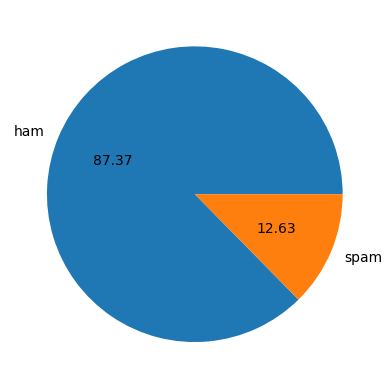

In [24]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f')

In [25]:
# we can see here that ham is very big that spam 

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nooro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters'] = df['text'].apply(len) #number of char

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #words count

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #sentence

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [35]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# targeting ham 
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# targeting spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

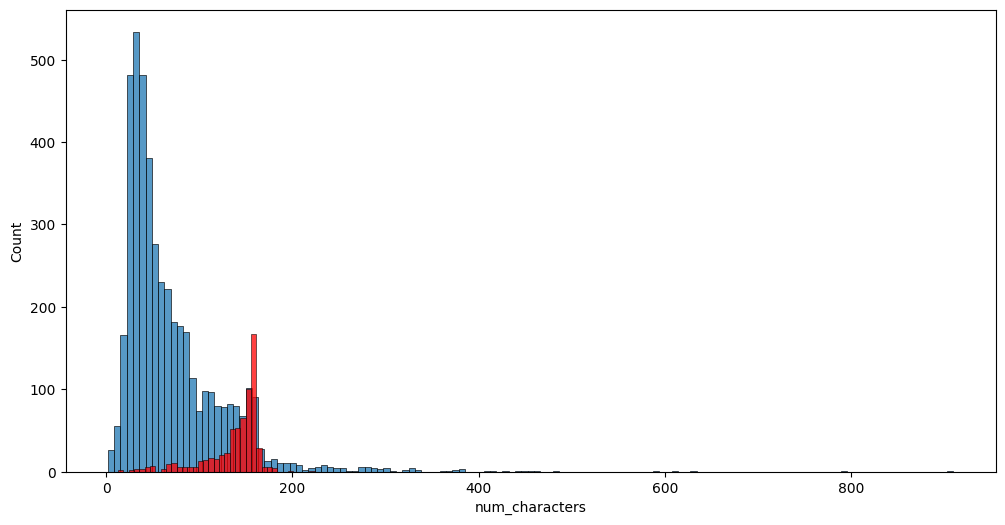

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters']) #ham number of char
sns.histplot(df[df['target'] == 1]['num_characters'], color='red') #spam number of char


<Axes: xlabel='num_words', ylabel='Count'>

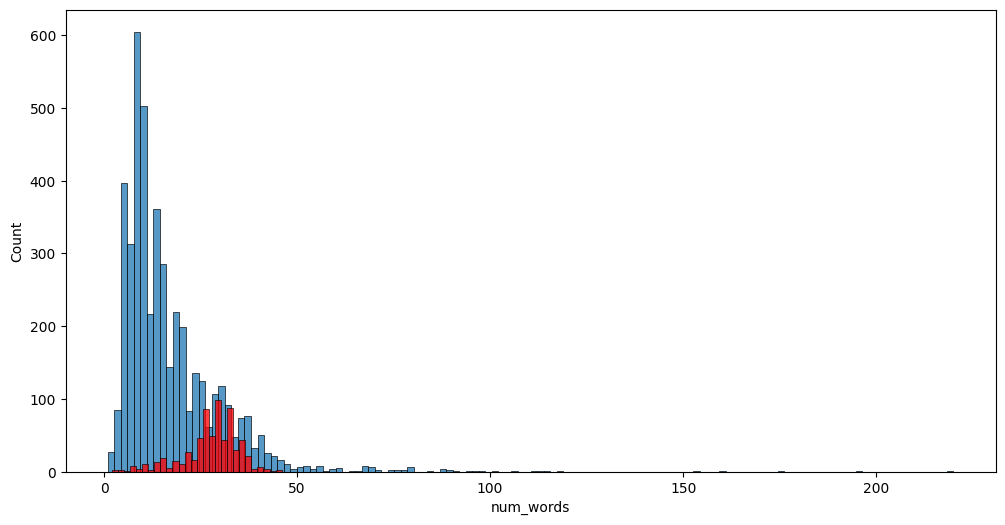

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words']) #ham number of words
sns.histplot(df[df['target'] == 1]['num_words'], color='red') #spam number of words


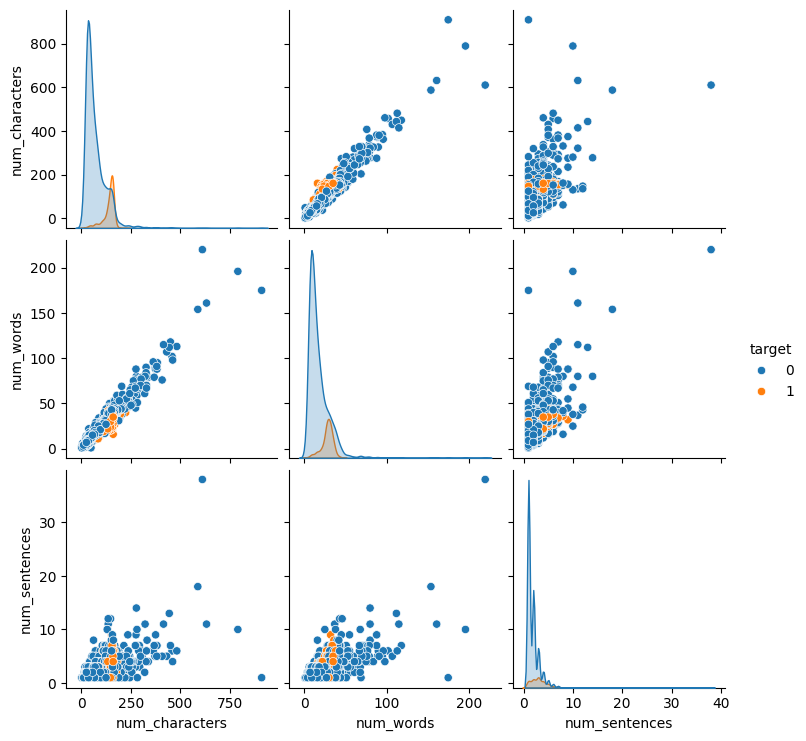

In [41]:
sns.pairplot(df, hue='target')

In [42]:
# sns.heatmap(df.corr(),annot=True)

### Data Preprocessing 
-Lower case 
-Tokenization 
-Removing special characters 
-Removing stop words and punctution 
-stemming

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') # You may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text: 
        if i.isalnum():
            y.append(i)

    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

transformed_text = transform_text("'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'")

print(transformed_text)

until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat 'go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nooro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

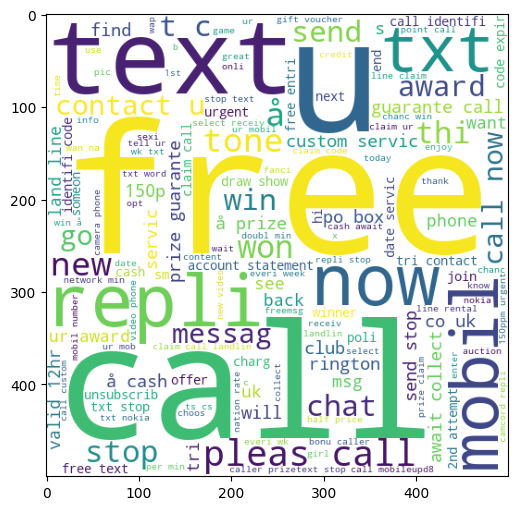

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

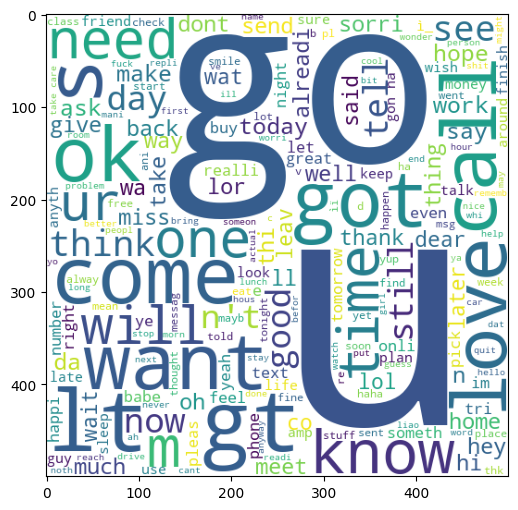

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

25558

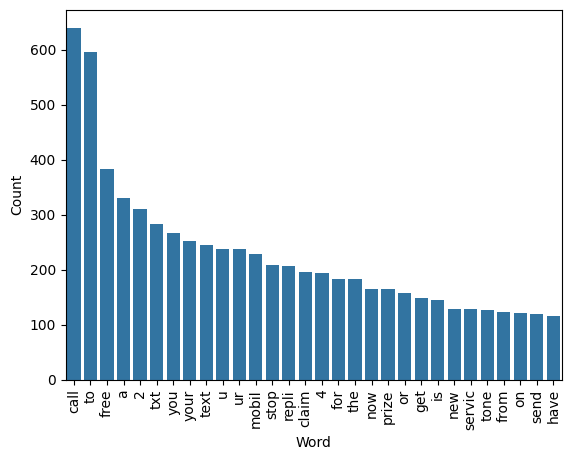

In [56]:
from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show

# Assuming spam_corpus is your list of text data

# Count the occurrences of each item in spam_corpus
word_counts = Counter(spam_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common words
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

102706

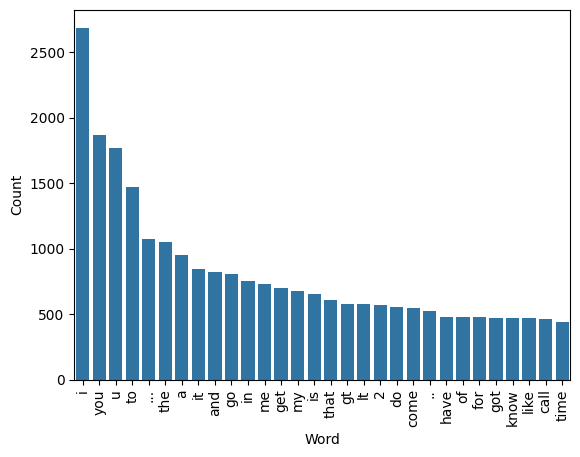

In [59]:
# Assuming spam_corpus is your list of text data

# Count the occurrences of each item in spam_corpus
word_counts = Counter(ham_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common words
common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the barplot
sns.barplot(data=common_words_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni ok lar ... joke wif u on...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say u ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


### 4.building the model 

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 3000)

In [64]:
y = df['target'].values

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [68]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[796 100]
 [ 24 114]]
0.5327102803738317


In [69]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [70]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[893   3]
 [ 14 124]]
0.9763779527559056


In [71]:
# tfidf --> mnb

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
lgr = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xbg = XGBClassifier(n_estimators=50, random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LM': lgr,
    'RF': rfc,
    'AdaBoost': abc,
    'Bgc': bgc,
    'ETC': etc,
    'GBDT': gbc,
    'xgb': xbg

}

In [75]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)  
    prec = precision_score(y_test, y_pred)  

    return acc, prec

In [76]:
train_classifier(knc, X_train, y_train, X_test, y_test)

(0.90715667311412, 1.0)

In [77]:
accuracy_scores = []  
precision_scores = []  

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy ", current_accuracy)
    print("precision ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9806576402321083
precision  0.9836065573770492
For  KN
Accuracy  0.90715667311412
precision  1.0
For  NB
Accuracy  0.97678916827853
precision  1.0
For  DT
Accuracy  0.937137330754352
precision  0.8543689320388349
For  LM
Accuracy  0.9584139264990329
precision  0.9439252336448598
For  RF
Accuracy  0.9709864603481625
precision  0.9821428571428571


c:\Noor_work\Baharat_Intern\Tasks\Email_Spam_Clasifer\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy  0.9680851063829787
precision  0.926829268292683
For  Bgc
Accuracy  0.9671179883945842
precision  0.8939393939393939
For  ETC
Accuracy  0.9787234042553191
precision  0.9833333333333333
For  GBDT
Accuracy  0.9574468085106383
precision  0.97
For  xgb
Accuracy  0.9787234042553191
precision  0.967741935483871


In [78]:
##model improve 

In [79]:
#VOTING Classifier 
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [80]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [81]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
precision 0.991869918699187


In [83]:
# applying stacking 
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
precision 0.9621212121212122


In [97]:
b=df["text"]
b
c = df["target"]

In [98]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels (replace with your actual data)

# X_train = ["sample text 1", "sample text 2", "sample text 3"]
# y_train = [0,1,0] #Example labels (0 for negative, 1 for +)

#create and train the IF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(b)

#create and train the Naive bayes classifier 
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, c)

#save the trained Tf-idf vectorizer and Naive Bayes model to files 
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

